In [7]:
from cassL import camb_interface as ci
import copy as cp
import matplotlib.pyplot as plt
import numpy as np

In [8]:
m0 = ci.specify_neutrino_mass(ci.cosm.iloc[0], 0, 0)

In [9]:
k0, z0, p0, s0 = ci.evaluate_cosmology(m0, hubble_units=False)

Let's try to handle this programmatically: let's make an array of key words over which to iterate
for the five parameters
Then let's try values 20% lower and 20% higher than LCDM best fit.

We'll have to handle sigma12 differently

In [10]:
parameters_to_naively_vary = ["ombh2", "omch2", "n_s", "A_s"]
parameters_TeX = ["$\omega_b$", "$\omega_c$", "$n_s$", "$A_s$"]

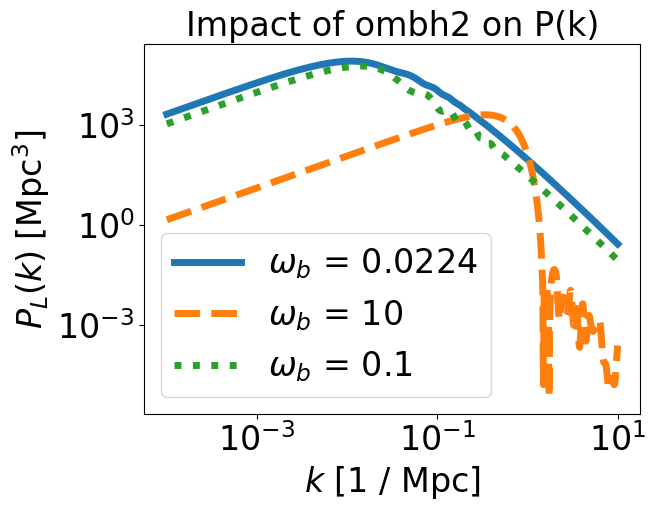

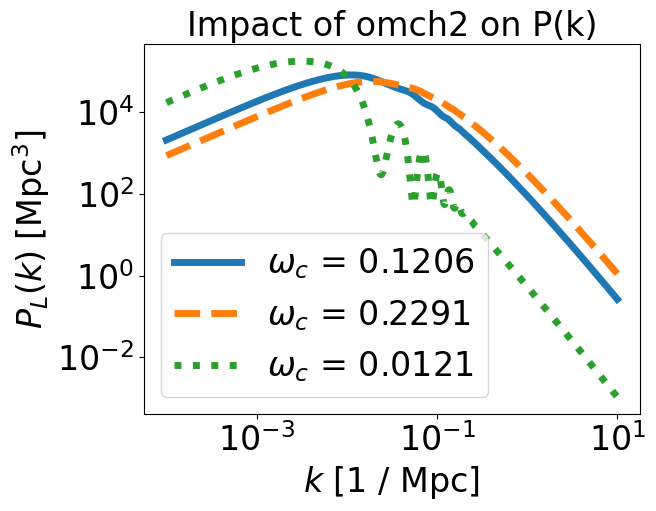

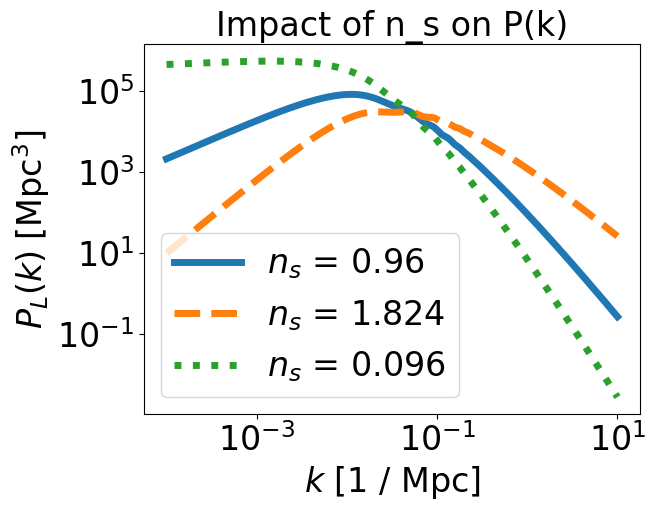

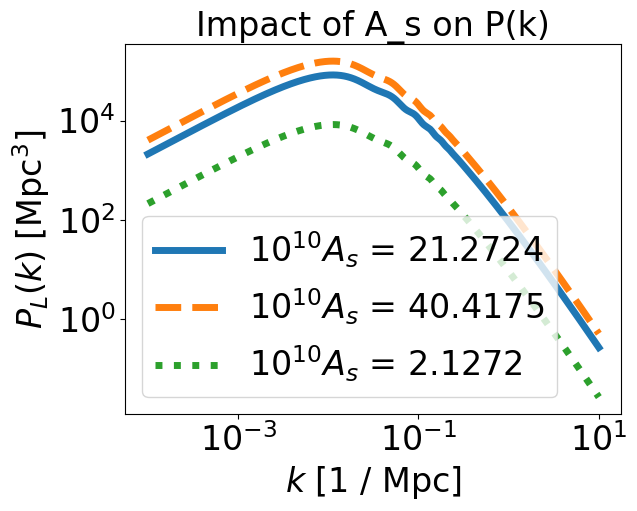

In [31]:
for i in range(len(parameters_to_naively_vary)):
    parameter = parameters_to_naively_vary[i]
    TeX = parameters_TeX[i]
    val0 = m0[parameter]
    
    lo_val = .1 * val0

    if parameter == "ombh2":
        lo_val = 0.1
    
    lo_cosmology = cp.deepcopy(m0)
    lo_cosmology[parameter] = lo_val
    lo_k, lo_z, lo_p, lo_s = ci.evaluate_cosmology(lo_cosmology, hubble_units=False)

    hi_val = 1.9 * val0

    if parameter == "ombh2":
        hi_val = 10
    
    hi_cosmology = cp.deepcopy(m0)
    hi_cosmology[parameter] = hi_val
    hi_k, hi_z, hi_p, hi_s = ci.evaluate_cosmology(hi_cosmology, hubble_units=False)

    fig = plt.figure()
    ax = fig.gca()
    
    ax.set_title("Impact of " + TeX + " on P(k)", fontsize=24)
    ax.set_xlabel("$k$ [1 / Mpc]", fontsize=24)
    ax.set_ylabel("$P_L(k)$ [Mpc$^3$]", fontsize=24)

    if parameter == "A_s":
        val0 *= 10 ** 10
        hi_val *= 10 ** 10
        lo_val *= 10 ** 10
        TeX = "$10^{10} A_s$"
    
    ax.loglog(k0, p0, label=TeX + " = " + str(np.around(val0, 4)),
              linestyle="solid", linewidth=5)
    ax.loglog(hi_k, hi_p, label=TeX + " = " + str(np.around(hi_val, 4)),
               linestyle="dashed", linewidth=5)
    ax.loglog(lo_k, lo_p, label=TeX + " = " + str(np.around(lo_val, 4)),
               linestyle="dotted", linewidth=5)
        
    ax.tick_params(labelsize=24)
    
    #plt.xticks(weight = 'bold')
    plt.legend(fontsize=24)
    
    plt.savefig("plots/" + parameter + "_impact_on_Pk.png", bbox_inches='tight')
    plt.show()

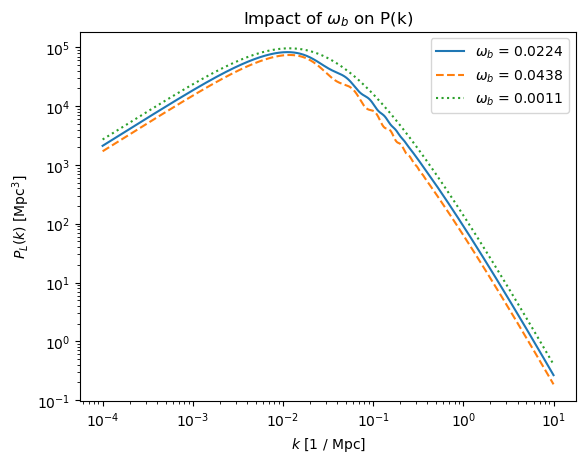

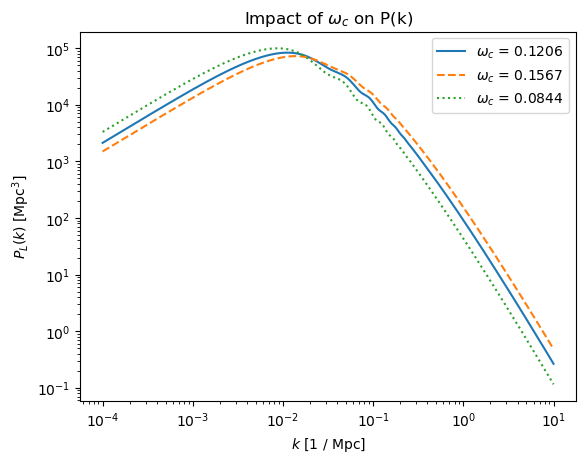

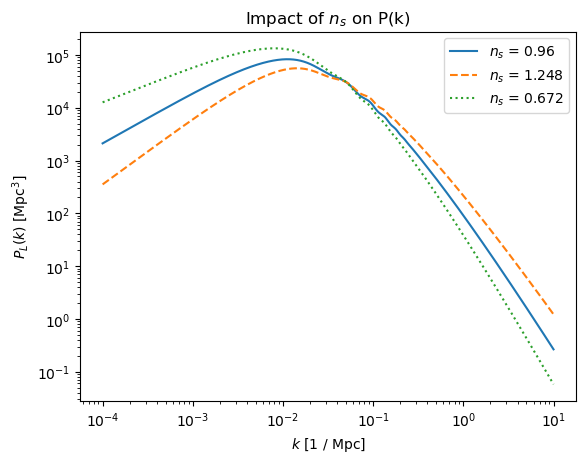

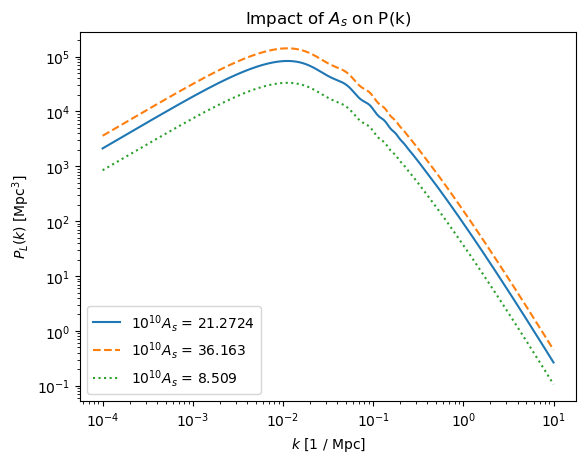

In [35]:
for i in range(len(parameters_to_naively_vary)):
    parameter = parameters_to_naively_vary[i]
    TeX = parameters_TeX[i]
    val0 = m0[parameter]
    
    lo_val = .7 * val0

    if parameter == "ombh2":
        lo_val = .05 * val0

    if parameter == "A_s":
        lo_val = .4 * val0
    
    lo_cosmology = cp.deepcopy(m0)
    lo_cosmology[parameter] = lo_val
    lo_k, lo_z, lo_p, lo_s = ci.evaluate_cosmology(lo_cosmology, hubble_units=False)

    hi_val = 1.3 * val0

    if parameter == "ombh2":
        hi_val = 1.95 * val0

    if parameter == "A_s":
        hi_val = 1.7 * val0
    
    hi_cosmology = cp.deepcopy(m0)
    hi_cosmology[parameter] = hi_val
    hi_k, hi_z, hi_p, hi_s = ci.evaluate_cosmology(hi_cosmology, hubble_units=False)

    fig = plt.figure()
    ax = fig.gca()
    
    ax.set_title("Impact of " + TeX + " on P(k)")
    ax.set_xlabel("$k$ [1 / Mpc]")
    ax.set_ylabel("$P_L(k)$ [Mpc$^3$]")

    if parameter == "A_s":
        val0 *= 10 ** 10
        hi_val *= 10 ** 10
        lo_val *= 10 ** 10
        TeX = "$10^{10} A_s$"
    
    ax.loglog(k0, p0, label=TeX + " = " + str(np.around(val0, 4)),
              linestyle="solid")
    ax.loglog(hi_k, hi_p, label=TeX + " = " + str(np.around(hi_val, 4)),
               linestyle="dashed")
    ax.loglog(lo_k, lo_p, label=TeX + " = " + str(np.around(lo_val, 4)),
               linestyle="dotted")
        
    #ax.tick_params(labelsize=24)
    
    #plt.xticks(weight = 'bold')
    plt.legend()
    
    plt.savefig("plots/" + parameter + "_impact_on_Pk.png", bbox_inches='tight')
    plt.show()

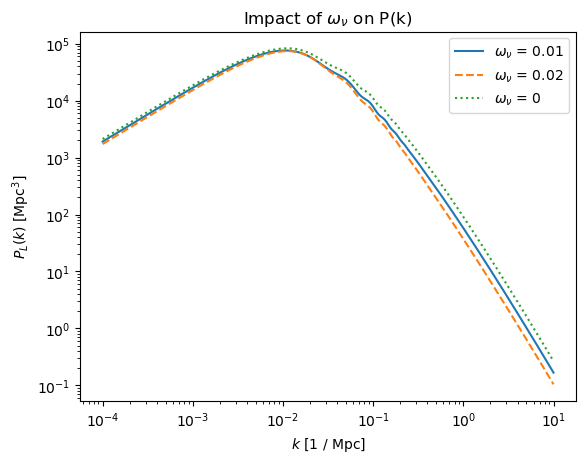

In [39]:
parameter = "ombh2"
TeX = r"$\omega_\nu$"
hi_val = 0.02
med_val = 0.01
lo_val = 0

hi_cosmology = ci.specify_neutrino_mass(m0, hi_val, 1)
hi_k, hi_z, hi_p, hi_s = ci.evaluate_cosmology(hi_cosmology, hubble_units=False)

med_cosmology = ci.specify_neutrino_mass(m0, med_val, 1)
med_k, med_z, med_p, med_s = ci.evaluate_cosmology(med_cosmology, hubble_units=False)

lo_cosmology = cp.deepcopy(m0)
lo_k, lo_z, lo_p, lo_s = ci.evaluate_cosmology(lo_cosmology, hubble_units=False)

fig = plt.figure()
ax = fig.gca()

ax.set_title("Impact of " + TeX + " on P(k)")
ax.set_xlabel("$k$ [1 / Mpc]")
ax.set_ylabel("$P_L(k)$ [Mpc$^3$]")

ax.loglog(med_k, med_p, label=TeX + " = " + str(np.around(med_val, 4)),
          linestyle="solid")
ax.loglog(hi_k, hi_p, label=TeX + " = " + str(np.around(hi_val, 4)),
           linestyle="dashed")
ax.loglog(lo_k, lo_p, label=TeX + " = " + str(np.around(lo_val, 4)),
           linestyle="dotted")
    
#ax.tick_params(labelsize=24)

#plt.xticks(weight = 'bold')
plt.legend()

plt.savefig("plots/" + parameter + "_impact_on_Pk.png", bbox_inches='tight')
plt.show()

In [38]:
ci.specify_neutrino_mass?

Signature: ci.specify_neutrino_mass(mlc, omnuh2_in, nnu_massive_in=1)
Docstring:
Helper function for input_cosmology.
This returns modified copy (and therefore does not mutate the original) of
the input dictionary object, which corresponds to a cosmology with massive
neutrinos.
File:      t:\github\master\cassl\camb_interface.py
Type:      function

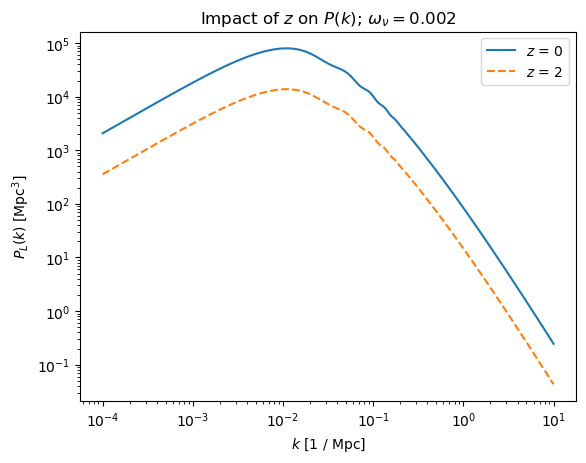

In [42]:
TeX = r"$z$"
the_val = 0.002

lo_val = 0
hi_val = 2

the_cosmology = ci.specify_neutrino_mass(m0, the_val, 1)
new_k, new_z, new_p, new_s = ci.evaluate_cosmology(the_cosmology, hubble_units=False)
old_k, old_z, old_p, old_s = ci.evaluate_cosmology(the_cosmology, redshifts=[2], hubble_units=False)

fig = plt.figure()
ax = fig.gca()

ax.set_title("Impact of " + TeX + r" on $P(k)$; $\omega_\nu = 0.002$")
ax.set_xlabel("$k$ [1 / Mpc]")
ax.set_ylabel("$P_L(k)$ [Mpc$^3$]")

ax.loglog(new_k, new_p, label=TeX + " = " + str(np.around(lo_val, 4)),
          linestyle="solid")
ax.loglog(old_k, old_p, label=TeX + " = " + str(np.around(hi_val, 4)),
           linestyle="dashed")
    
#ax.tick_params(labelsize=24)

#plt.xticks(weight = 'bold')
plt.legend()

plt.savefig("plots/redshift_dependence_neutrinos", bbox_inches='tight')
plt.show()

In [40]:
ci.evaluate_cosmology?

Signature:
ci.evaluate_cosmology(
    cosmology,
    redshifts=[0],
    fancy_neutrinos=False,
    k_points=100000,
    hubble_units=False,
)
Docstring:
ISSUE! It does not seem like the current state of the code actually
    supports redshifts=None. We should test and make sure, then correct if
    necessary.

Return the scale axis, redshifts, power spectrum, and sigma12 of a
    cosmological model specified by a dictionary of parameter values.

Parameters:
-----------
cosmology: dict
    a dictionary of value for CAMBparams fields
redshifts: array of redshift values at which to evaluate the model
    If you would like to fix the sigma12 value, specify this in the mlc
    dictionary and set this parameter to None. If you would not like to
    fix the sigma12 value, make sure that the mlc dictionary does not
    contain a non-None sigma12 entry.

@param omnuh2_in : neutrino physical mass density
@fancy_neutrinos: flag sets whether we attempt to impose a neutrino
    scheme on CAMB after